In [36]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """Adapted from "The Colors of Animals" by Sir John Lubbock in A Book of Natural History (1902, ed. David Starr Jordan)

The color of animals is by no means a matter of chance; it depends on many considerations, but in the majority of cases tends to protect the animal from danger by rendering it less conspicuous. Perhaps it may be said that if coloring is mainly protective, there ought to be but few brightly colored animals. There are, however, not a few cases in which vivid colors are themselves protective. The kingfisher itself, though so brightly colored, is by no means easy to see. The blue harmonizes with the water, and the bird as it darts along the stream looks almost like a flash of sunlight.

Desert animals are generally the color of the desert. Thus, for instance, the lion, the antelope, and the wild donkey are all sand-colored. “Indeed,” says Canon Tristram, “in the desert, where neither trees, brushwood, nor even undulation of the surface afford the slightest protection to its foes, a modification of color assimilated to that of the surrounding country is absolutely necessary. Hence, without exception, the upper plumage of every bird, and also the fur of all the smaller mammals and the skin of all the snakes and lizards, is of one uniform sand color.”

The next point is the color of the mature caterpillars, some of which are brown. This probably makes the caterpillar even more conspicuous among the green leaves than would otherwise be the case. Let us see, then, whether the habits of the insect will throw any light upon the riddle. What would you do if you were a big caterpillar? Why, like most other defenseless creatures, you would feed by night, and lie concealed by day. So do these caterpillars. When the morning light comes, they creep down the stem of the food plant, and lie concealed among the thick herbage and dry sticks and leaves, near the ground, and it is obvious that under such circumstances the brown color really becomes a protection. It might indeed be argued that the caterpillars, having become brown, concealed themselves on the ground, and that we were reversing the state of things. But this is not so, because, while we may say as a general rule that large caterpillars feed by night and lie concealed by day, it is by no means always the case that they are brown; some of them still retaining the green color. We may then conclude that the habit of concealing themselves by day came first, and that the brown color is a later adaptation."""

In [37]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [38]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['adapted from "the colors of animals" by sir john lubbock in a book of natural history ( , ed.',
 'david starr jordan) the color of animals is by no means a matter of chance; it depends on many considerations, but in the majority of cases tends to protect the animal from danger by rendering it less conspicuous.',
 'perhaps it may be said that if coloring is mainly protective, there ought to be but few brightly colored animals.',
 'there are, however, not a few cases in which vivid colors are themselves protective.',
 'the kingfisher itself, though so brightly colored, is by no means easy to see.',
 'the blue harmonizes with the water, and the bird as it darts along the stream looks almost like a flash of sunlight.',
 'desert animals are generally the color of the desert.',
 'thus, for instance, the lion, the antelope, and the wild donkey are all sand-colored.',
 '“indeed,” says canon tristram, “in the desert, where neither trees, brushwood, nor even undulation of the surface afford th

In [39]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [40]:
sent_word

[['adapted',
  'from',
  '``',
  'the',
  'colors',
  'of',
  'animals',
  "''",
  'by',
  'sir',
  'john',
  'lubbock',
  'in',
  'a',
  'book',
  'of',
  'natural',
  'history',
  '(',
  ',',
  'ed',
  '.'],
 ['david',
  'starr',
  'jordan',
  ')',
  'the',
  'color',
  'of',
  'animals',
  'is',
  'by',
  'no',
  'means',
  'a',
  'matter',
  'of',
  'chance',
  ';',
  'it',
  'depends',
  'on',
  'many',
  'considerations',
  ',',
  'but',
  'in',
  'the',
  'majority',
  'of',
  'cases',
  'tends',
  'to',
  'protect',
  'the',
  'animal',
  'from',
  'danger',
  'by',
  'rendering',
  'it',
  'less',
  'conspicuous',
  '.'],
 ['perhaps',
  'it',
  'may',
  'be',
  'said',
  'that',
  'if',
  'coloring',
  'is',
  'mainly',
  'protective',
  ',',
  'there',
  'ought',
  'to',
  'be',
  'but',
  'few',
  'brightly',
  'colored',
  'animals',
  '.'],
 ['there',
  'are',
  ',',
  'however',
  ',',
  'not',
  'a',
  'few',
  'cases',
  'in',
  'which',
  'vivid',
  'colors',
  'are',


In [41]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [42]:
sent_word

[['adapted',
  '``',
  'colors',
  'animals',
  "''",
  'sir',
  'john',
  'lubbock',
  'book',
  'natural',
  'history',
  '(',
  ',',
  'ed',
  '.'],
 ['david',
  'starr',
  'jordan',
  ')',
  'color',
  'animals',
  'means',
  'matter',
  'chance',
  ';',
  'depends',
  'many',
  'considerations',
  ',',
  'majority',
  'cases',
  'tends',
  'protect',
  'animal',
  'danger',
  'rendering',
  'less',
  'conspicuous',
  '.'],
 ['perhaps',
  'may',
  'said',
  'coloring',
  'mainly',
  'protective',
  ',',
  'ought',
  'brightly',
  'colored',
  'animals',
  '.'],
 [',', 'however', ',', 'cases', 'vivid', 'colors', 'protective', '.'],
 ['kingfisher',
  ',',
  'though',
  'brightly',
  'colored',
  ',',
  'means',
  'easy',
  'see',
  '.'],
 ['blue',
  'harmonizes',
  'water',
  ',',
  'bird',
  'darts',
  'along',
  'stream',
  'looks',
  'almost',
  'like',
  'flash',
  'sunlight',
  '.'],
 ['desert', 'animals', 'generally', 'color', 'desert', '.'],
 ['thus',
  ',',
  'instance',
  ',

In [43]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [44]:
# Test the word vectors
vector = model.wv['animals']

print(vector)

[-2.2504341e-03  2.2404986e-03  4.0231855e-03  4.8895315e-03
  1.0661607e-03  1.3380382e-03  3.5778233e-03 -3.7071833e-03
 -1.1323347e-03  2.3511278e-03 -3.7581180e-03  3.4746726e-03
  1.8204714e-03 -3.0763282e-03 -4.2042634e-03 -3.0968206e-03
  4.7614388e-03  1.7751452e-03  4.7247289e-03 -3.2455516e-03
 -3.4213157e-03 -4.9587227e-03 -4.7123368e-04 -1.8242808e-03
  1.5468313e-03 -1.2241530e-03  1.9138578e-03  4.4439426e-03
  1.0772173e-03 -1.7438260e-03 -3.9699264e-03 -1.9887721e-03
  3.9191386e-03 -2.9015180e-03 -6.5398990e-04  2.5019350e-03
 -3.0077045e-04  4.8094555e-03 -3.9041801e-03 -1.0585734e-03
  4.5767711e-03  2.1547412e-03 -2.5111018e-03 -4.3660733e-03
  7.6694577e-04  1.3808247e-05 -2.8826597e-03  2.5662559e-03
 -3.3791331e-03  3.5105373e-03 -4.0476308e-03  3.7478961e-04
 -4.3913745e-03  2.6129917e-03  3.9459025e-03 -1.0912550e-03
  1.4313466e-03 -1.0178855e-03  2.6135526e-03  4.6340576e-03
 -9.7085728e-04  3.1776002e-03  3.4195276e-03  4.9754307e-03
  2.8755455e-03 -9.06738

In [45]:
# Most similar words
similar = model.wv.most_similar('sunlight',topn=20)

similar

[('caterpillar', 0.35518383979797363),
 ('blue', 0.24515771865844727),
 ('lizards', 0.23276358842849731),
 ('morning', 0.22715769708156586),
 ('creep', 0.22091619670391083),
 ('night', 0.2119649201631546),
 ('cases', 0.2103389948606491),
 ('modification', 0.20969699323177338),
 ('antelope', 0.18673601746559143),
 ("''", 0.1825866401195526),
 ('next', 0.17406006157398224),
 ('becomes', 0.17395728826522827),
 ('us', 0.1732831597328186),
 ('animals', 0.17195427417755127),
 ('like', 0.16960740089416504),
 ('thick', 0.16641582548618317),
 ('jordan', 0.16033241152763367),
 ('green', 0.15872159600257874),
 ('john', 0.1586955189704895),
 ('kingfisher', 0.15821412205696106)]

In [46]:
# You can also check words similarity and compare above
model.wv.similarity(w1='caterpillar',w2='caterpillars')

0.20668098

In [47]:
# Same words similarity
model.wv.similarity(w1='color',w2='color')

1.0

In [48]:
# filter on non similarity
model.wv.doesnt_match(["history","jordan","brightly"])

C:\Users\Dell\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'history'

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


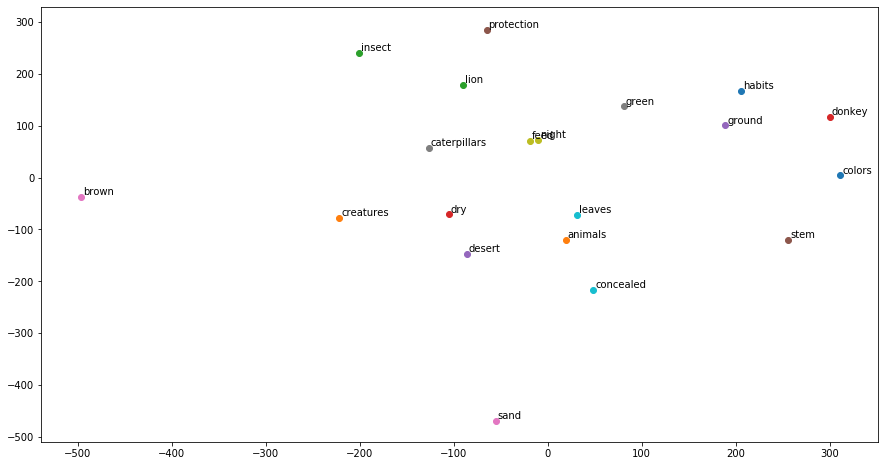

In [49]:
from sklearn.manifold import  TSNE
vocab = ['colors','animals','lion','donkey','desert','stem','sand','green','feed','leaves','habits','creatures','insect','dry','ground','protection','brown','caterpillars','night','concealed']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=45)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)